In [1]:
import pandas as pd

df = pd.read_csv("../data/questions.csv")

## 列规范化
import json

# 过滤掉没有type的行
df = df[df.type != "[]"]

df["title"] = df.title.apply(eval)
df["level"] = df.level.apply(lambda x: eval(x)[0])
df["type"] = df.type.apply(eval)
df["level_score"] = df['level'].apply(lambda x: {"简单": 1, "中等": 2, "困难": 3}[x])

## 题目类型计数

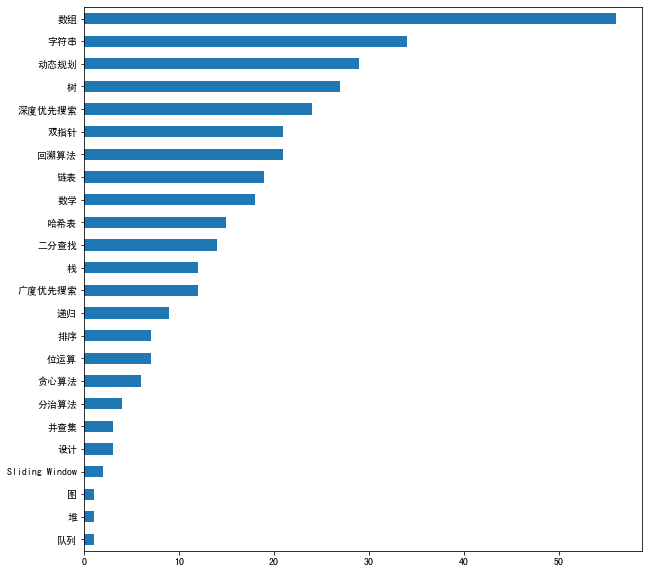

In [2]:
from collections import defaultdict

from matplotlib import pyplot as plt

# mpl.rcParams['font.sans-serif'] = ['KaiTi']
# mpl.rcParams['font.serif'] = ['KaiTi']
figsize = 10
plt.figure(figsize=(figsize,figsize))

count = defaultdict(int)

for types in df.type:
    for type_ in types:
        count[type_] += 1

pd.Series(count).sort_values(ascending=True).plot(kind="barh")

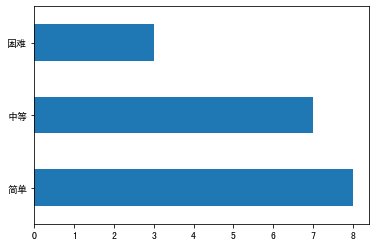

In [3]:
df[df.type.apply(lambda x: "数学" in x)].level.value_counts().plot(kind="barh")

In [4]:
df[df.type.apply(lambda x: "链表" in x)].level_score.mean()

1.894736842105263

In [5]:
# 看任意一种题型的难度
type2score = {}
for type_ in count:
    type2score[type_] = df[df.type.apply(lambda x: type_ in x)].level_score.mean()
pd.Series(type2score).sort_values()

位运算               1.428571
设计                1.666667
数学                1.722222
递归                1.777778
深度优先搜索            1.791667
双指针               1.809524
树                 1.814815
链表                1.894737
数组                1.946429
图                 2.000000
广度优先搜索            2.000000
队列                2.000000
分治算法              2.000000
二分查找              2.000000
栈                 2.083333
字符串               2.117647
排序                2.142857
哈希表               2.200000
贪心算法              2.333333
并查集               2.333333
动态规划              2.379310
回溯算法              2.380952
Sliding Window    2.500000
堆                 3.000000
dtype: float64

### 分析出题目的主类型

In [6]:

def get_main_type(types):
    rst = types[0]
    for type_ in types:
        if count[type_] < count[rst]:
            rst = type_
    return rst

df["main_type"] = df.type.apply(get_main_type)

In [7]:
# df.pivot_table(index="main_type", columns=["level"], values=["level_score"], aggfunc={"level_score": "count"}, fill_value=0)

In [8]:
df.pivot_table(
    index='main_type', 
    values=["level", "level_score"],
    aggfunc={"level": "count", "level_score": "mean"}
).sort_values(["level", "level_score"], ascending=[False, True]).rename(columns={"level": "数量", "level_score": "难度"})

,数量,难度
main_type,,
动态规划,19,2.315789
回溯算法,15,2.266667
二分查找,13,1.923077
数学,12,1.583333
链表,12,1.833333
数组,10,1.800000
深度优先搜索,10,1.800000
栈,10,2.200000
双指针,9,1.444444


In [9]:
df[df.main_type=="动态规划"]

,title,level,type,level_score,main_type
4,"[5, . , 最长回文子串]",中等,"[字符串, 动态规划]",2,动态规划
31,"[32, . , 最长有效括号]",困难,"[字符串, 动态规划]",3,动态规划
61,"[62, . , 不同路径]",中等,"[数组, 动态规划]",2,动态规划
62,"[63, . , 不同路径 II]",中等,"[数组, 动态规划]",2,动态规划
63,"[64, . , 最小路径和]",中等,"[数组, 动态规划]",2,动态规划
69,"[70, . , 爬楼梯]",简单,[动态规划],1,动态规划
71,"[72, . , 编辑距离]",困难,"[字符串, 动态规划]",3,动态规划
86,"[87, . , 扰乱字符串]",困难,"[字符串, 动态规划]",3,动态规划
90,"[91, . , 解码方法]",中等,"[字符串, 动态规划]",2,动态规划
96,"[97, . , 交错字符串]",困难,"[字符串, 动态规划]",3,动态规划
